# Posterior overlap with astrophysical distribution

In [5]:
# get h5 file 'posterior_samples.h5'
import numpy as np
import h5py
import matplotlib.pyplot as plt
import corner

# convert redshift to luminosity distance with astropy
from astropy.cosmology import Planck18
from astropy import units as u
from ler.rates import LeR
from scipy.interpolate import interp1d

ler = LeR(verbose=False)

z_to_dl = lambda z: Planck18.luminosity_distance(z).to(u.Mpc).value

z = np.linspace(0, 10, 1000)
luminosity_distance = Planck18.luminosity_distance(z).value
from scipy.interpolate import interp1d
dl_to_z = interp1d(luminosity_distance, z, kind='cubic', fill_value='extrapolate')

## Event

In [13]:
# read h5 file
f = h5py.File('posterior_samples.h5', 'r')

# unlensed 
events = f['Combined_PHM_lowSecondarySpin']['posterior_samples']
#events['mass_1']
# detector farme
m1 = np.array(events['mass_1_source'])
m2 = np.array(events['mass_2_source'])
unlensed_mass_1 = m1[:945]
unlensed_mass_2 = m2[:945]
unlensed_chirp_mass = ( (m1*m2)**(3/5) )/( (m1+m2)**(1/5) )
unlensed_chirp_mass = unlensed_chirp_mass[:945]
dl = np.array(events['luminosity_distance'])
unlensed_redshift = dl_to_z(dl)[:945]

## Double gaussian mass distribution

### Detectable un-lensed astrophysical distribution

In [8]:
# get the unlensed event
from ler.utils import get_param_from_json
unlensed_params = get_param_from_json('ler_data/n_unlensed_detectable_bns.json')

In [9]:
m1_unlensed = unlensed_params['mass_1_source']
m2_unlensed = unlensed_params['mass_2_source']
mc_unlensed = ( (m1_unlensed*m2_unlensed)**(3/5) )/( (m1_unlensed+m2_unlensed)**(1/5) )
zs_unlensed = unlensed_params['zs']

### Detectable lensed astrophysical distribution

In [10]:
# get the lensed event
from ler.utils import get_param_from_json
lensed_params = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

In [11]:
# detectable
lensed_params_detectable = get_param_from_json('ler_data/n_lensed_detectable_bns.json')

# detector frame masses
m1_l_det = np.array(lensed_params_detectable['mass_1'])
m2_l_det = np.array(lensed_params_detectable['mass_2'])
# chirp mass
mc_l_det = m1_l_det
mc_l_det = np.array([mc_l_det, mc_l_det, mc_l_det, mc_l_det]).T
m1_l_det = np.array([m1_l_det, m1_l_det, m1_l_det, m1_l_det]).T
m2_l_det = np.array([m2_l_det, m2_l_det, m2_l_det, m2_l_det]).T

# redshifts
zs_l_det = np.array(lensed_params_detectable['zs'])
zs_l_det = np.array([zs_l_det, zs_l_det, zs_l_det, zs_l_det]).T

# observed
dl_l_eff_det = np.array(lensed_params_detectable['effective_luminosity_distance'])
zs_l_eff_det = dl_to_z(np.array(dl_l_eff_det))
mc_l_eff_det = mc_l_det/(1+zs_l_eff_det)
m1_l_eff_det = m1_l_det/(1+zs_l_eff_det)
m2_l_eff_det = m2_l_det/(1+zs_l_eff_det)

# avoid nan
zs_l_eff_det = zs_l_eff_det.flatten()
mc_l_eff_det = mc_l_eff_det.flatten()
m1_l_eff_det = m1_l_eff_det.flatten()
m2_l_eff_det = m2_l_eff_det.flatten()
zs_l_det = zs_l_det.flatten()
idx_nan = np.isnan(zs_l_eff_det)
zs_l_eff_det = zs_l_eff_det[~idx_nan]
mc_l_eff_det = mc_l_eff_det[~idx_nan]
m1_l_eff_det = m1_l_eff_det[~idx_nan]
m2_l_eff_det = m2_l_eff_det[~idx_nan]
zs_l_det = zs_l_det[~idx_nan]

# choose only detectable
snr_l_det = np.array(lensed_params_detectable['optimal_snr_net']).flatten()
snr_l_det = snr_l_det[~idx_nan]
idx_detectable = snr_l_det > 8
zs_l_eff_det = zs_l_eff_det[idx_detectable]
mc_l_eff_det = mc_l_eff_det[idx_detectable]
m1_l_eff_det = m1_l_eff_det[idx_detectable]
m2_l_eff_det = m2_l_eff_det[idx_detectable]
zs_l_det = zs_l_det[idx_detectable]

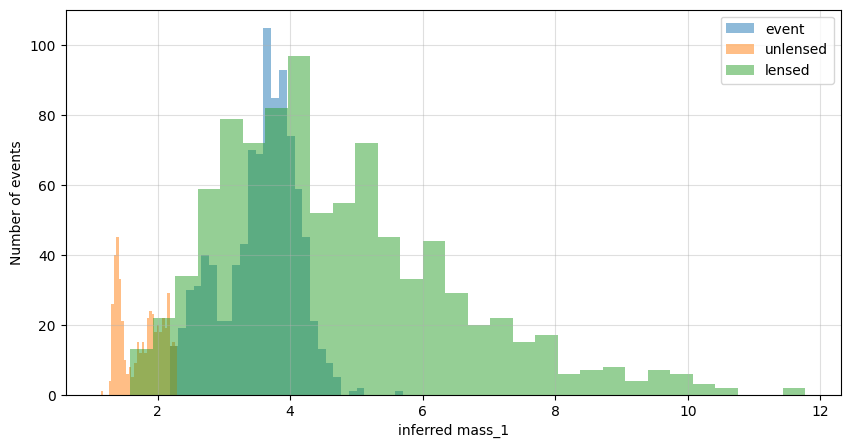

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(unlensed_mass_1, bins=30, alpha=0.5, density=False, label='event')
plt.hist(m1_unlensed, bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(m1_l_eff_det, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('inferred mass_1')
plt.ylabel('Number of events')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

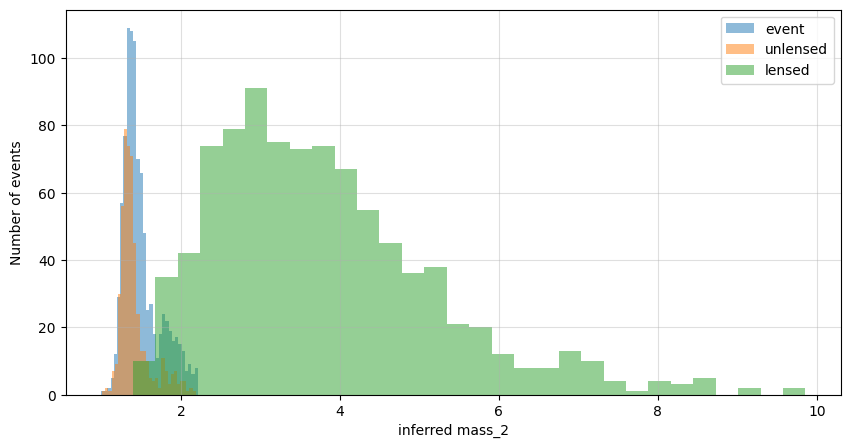

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(unlensed_mass_2, bins=30, alpha=0.5, density=False, label='event')
plt.hist(m2_unlensed, bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(m2_l_eff_det, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('inferred mass_2')
plt.ylabel('Number of events')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

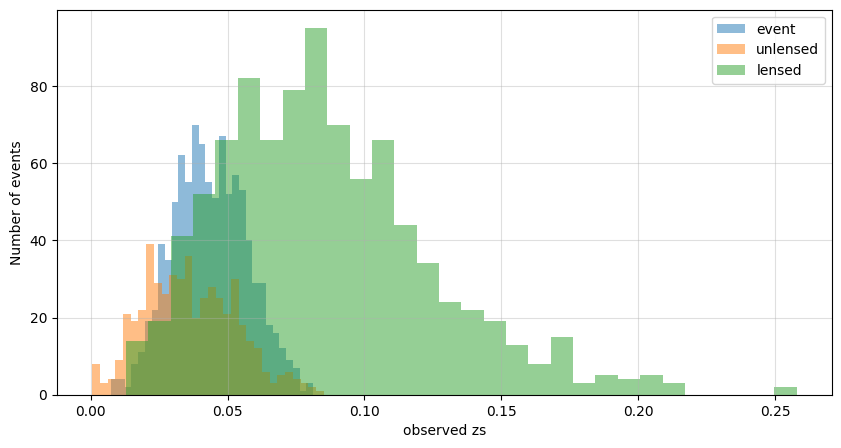

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(unlensed_redshift, bins=30, alpha=0.5, density=False, label='event')
plt.hist(zs_unlensed, bins=30, alpha=0.5, density=False, label='unlensed')
plt.hist(zs_l_eff_det, bins=30, alpha=0.5, density=False, label='lensed')
plt.xlabel('observed zs')
plt.ylabel('Number of events')
plt.legend()
plt.grid(alpha=0.4)
plt.show()

## Maths for posterior overlap

\begin{equation} 
\begin{split}
\mathcal{O}_U^L &= \frac{P(H_L|d)}{P(H_L|d)} \\ \nonumber
&= \frac{\int d\theta P(d|H_L,\theta)P(\theta|H_L)}{\int d\theta P(d|H_U,\theta)P(\theta|H_U)} \\
&= \frac{P(d) \int d\theta \frac{P(\theta|d) P_{astro}}{P_{PE}(\thera)}  }{\int d\theta P(d|H_U,\theta)P(\theta|H_U)}
\end{split}
\end{equation}

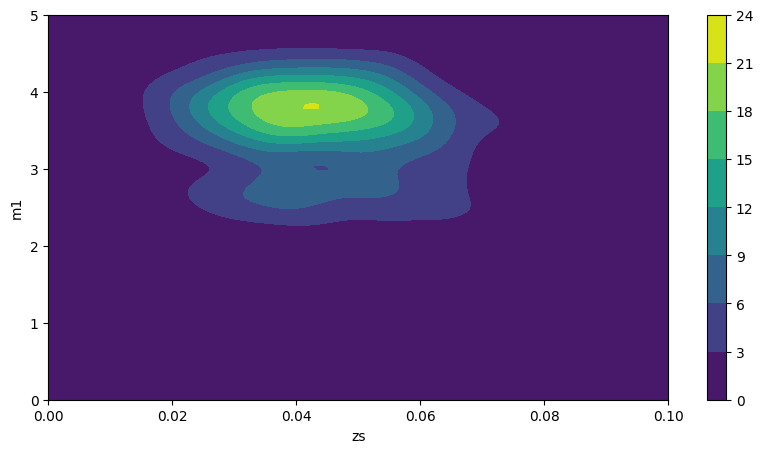

In [29]:
# let's create a 2d pdf from the sample data of m1 and zs
from scipy.stats import gaussian_kde
from scipy.stats import norm

# unlensed
xy = np.vstack([unlensed_redshift, unlensed_mass_1])
z = gaussian_kde(xy)(xy)

# new values
x_new = np.linspace(0, 0.1, 100)
y_new = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x_new, y_new)
positions = np.vstack([X.ravel(), Y.ravel()])
Z = gaussian_kde(xy)(positions)

# plot the pdf with X, Y, Z
# make it a countour line plot
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Z.reshape(X.shape), cmap='viridis')
plt.xlabel('zs')
plt.ylabel('m1')
plt.colorbar()

In [ ]:
def unlensed_pdf(zs, m1):
    return gaussian_kde(xy)(np.vstack([zs, m1]))
    